# OWQA Task - Model 3: RNNs + Attention
---

### Getting the Preprocessed data
---

In [1]:
%run ./ow_pre_model.ipynb
%run ../attention_layer.ipynb

Using TensorFlow backend.


** One-hot encoding the labels in two tensors . . .
** One-hot encoding the labels in two tensors . . .
(26395, 276)
Done.


---
## Model

In [7]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=256, input_dim=vocabulary_size,
                         input_length=c_maxlen, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=256, input_dim=vocabulary_size, 
                         input_length=q_maxlen, name='question_embedding')(question_input)

Q = Bidirectional(GRU(75, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(75, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(75, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(75, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(75, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(75, Q2, 75, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])

model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=20,
                    batch_size=50,
                    validation_split=0.2,
                    callbacks=[tb, mc])


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
context_input (InputLayer)       (None, 276)           0                                            
____________________________________________________________________________________________________
question_input (InputLayer)      (None, 36)            0                                            
____________________________________________________________________________________________________
context_embedding (Embedding)    (None, 276, 256)      21974528    context_input[0][0]              
____________________________________________________________________________________________________
question_embedding (Embedding)   (None, 36, 256)       21974528    question_input[0][0]             
___________________________________________________________________________________________

---
## Model Evaluation

Evaluating the model . . . 

3002/3002 [==============================] - 30s    

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



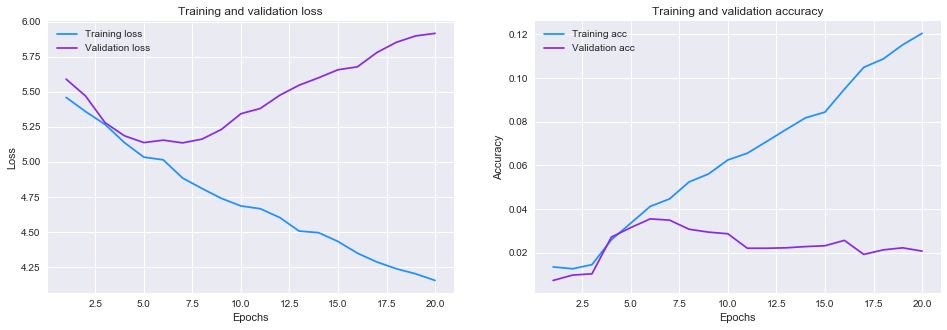

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  19.462019321841257 ;   Top2-EM:  28.069710172381132 ;   Top3-EM:  33.870051146050386 

                          loss  =  3.9400650006167974
                          acc  =  0.19920439477173707
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  2.4317121918720854 ;   Top2-EM:  3.9973351099267154 ;   Top3-EM:  4.996668887408394 

                          loss  =  5.8256467479932
                          acc  =  0.020986

In [8]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)



---
## Different Parameters

In [5]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=256, input_dim=vocabulary_size,
                         input_length=c_maxlen, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=256, input_dim=vocabulary_size, 
                         input_length=q_maxlen, name='question_embedding')(question_input)

Q = Bidirectional(GRU(75, return_sequences=True))(question_embedding)
Q = Dropout(0.2)(Q)
D = Bidirectional(GRU(75, return_sequences=True))(context_embedding)
D = Dropout(0.2)(D)
Q1 = Bidirectional(GRU(75, return_sequences=True))(Q)
Q1 = Dropout(0.2)(Q1)
D1 = Bidirectional(GRU(75, return_sequences=True))(D)
Q1 = Dropout(0.2)(D1)
Q2 = GRU(75, return_sequences=False)(Q1)
Q2 = Dropout(0.2)(Q2)
D2 = SimpleAttention(75, Q2, 75, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.005)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])

model.summary()
#tb = TensorBoard(log_dir='models_logs/attention')
#mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
context_input (InputLayer)       (None, 276)           0                                            
____________________________________________________________________________________________________
context_embedding (Embedding)    (None, 276, 256)      21974528    context_input[0][0]              
____________________________________________________________________________________________________
bidirectional_14 (Bidirectional) (None, 276, 150)      149400      context_embedding[0][0]          
____________________________________________________________________________________________________
dropout_17 (Dropout)             (None, 276, 150)      0           bidirectional_14[0][0]           
___________________________________________________________________________________________

Evaluating the model . . . 

3002/3002 [==============================] - 34s    

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



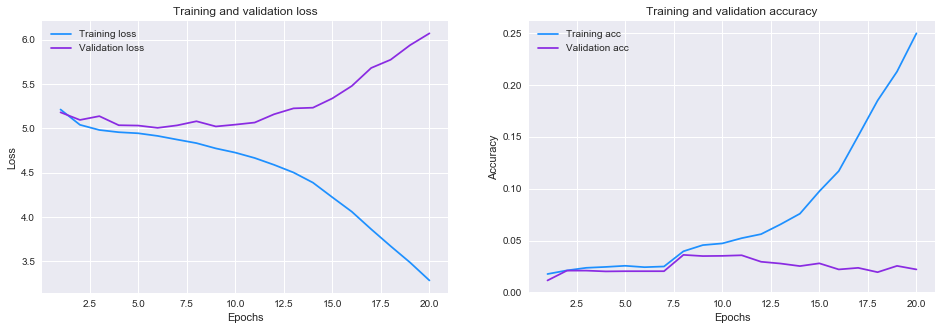

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  23.519605985982192 ;   Top2-EM:  33.32449327524152 ;   Top3-EM:  39.34078423943929 

                          loss  =  3.5575244329444926
                          acc  =  0.24716802424701648
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  2.598267821452365 ;   Top2-EM:  3.7308461025982678 ;   Top3-EM:  4.696868754163891 

                          loss  =  5.948871606195235
                          acc  =  0.0266489

In [6]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


---
## Previous, less successful runs

In [3]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.2, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.2, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.2, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.2, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.2, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.0005)
model.compile(optimizer=rms, loss='categorical_crossentropy',
              loss_weights=[0.04], metrics=['acc'])

model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[tb, mc])


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632  

Epoch 35/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1662 - acc: 0.0675 - val_loss: 0.2257 - val_acc: 0.0110
Epoch 36/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1648 - acc: 0.0701 - val_loss: 0.2306 - val_acc: 0.0146
Epoch 37/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1638 - acc: 0.0739 - val_loss: 0.2323 - val_acc: 0.0097
Epoch 38/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1627 - acc: 0.0763 - val_loss: 0.2303 - val_acc: 0.0119
Epoch 39/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1615 - acc: 0.0821 - val_loss: 0.2300 - val_acc: 0.0085
Epoch 40/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1606 - acc: 0.0864 - val_loss: 0.2340 - val_acc: 0.0117
Epoch 41/100
21116/21116 [==============================] - 80s 4ms/step - loss: 0.1592 - acc: 0.0908 - val_loss: 0.2371 - val_acc: 0.0119
Epoch 42/100
21116/21116 [=

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Evaluation
---

Evaluating the model . . . 

3002/3002 [==============================] - 33s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



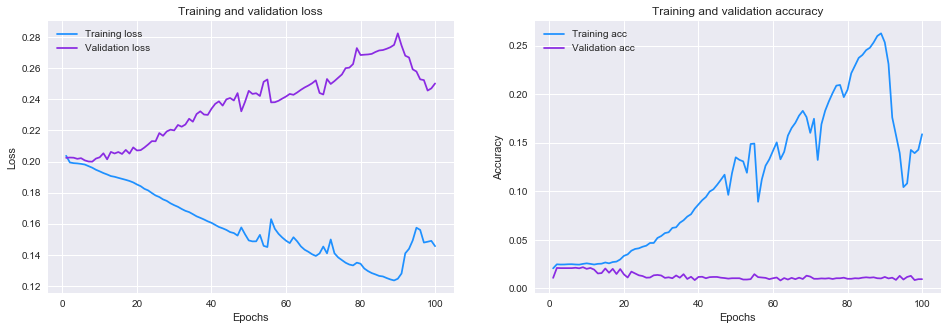

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  15.131653722295889 ;   Top2-EM:  23.746921765485887 ;   Top3-EM:  29.729115362758098 

                          loss  =  0.1601276279156306
                          acc  =  0.1605607122561091
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  1.5323117921385743 ;   Top2-EM:  2.664890073284477 ;   Top3-EM:  3.8307794803464357 

                          loss  =  0.24875801912869397
                          acc  =  0.012

In [4]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)


In [6]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen,  name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.005)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=50,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc])



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

Epoch 40/50
21116/21116 [==============================] - 69s 3ms/step - loss: 2.1099 - acc: 0.4601 - val_loss: 8.1301 - val_acc: 0.0110
Epoch 41/50
21116/21116 [==============================] - 64s 3ms/step - loss: 1.9984 - acc: 0.4867 - val_loss: 8.0344 - val_acc: 0.0121
Epoch 42/50
Epoch 43/50
21116/21116 [==============================] - 60s 3ms/step - loss: 1.8741 - acc: 0.5096 - val_loss: 8.5371 - val_acc: 0.0127
Epoch 44/50
21116/21116 [==============================] - 60s 3ms/step - loss: 1.8358 - acc: 0.5196 - val_loss: 8.2869 - val_acc: 0.0100
Epoch 45/50
21116/21116 [==============================] - 59s 3ms/step - loss: 1.7341 - acc: 0.5422 - val_loss: 8.4377 - val_acc: 0.0110
Epoch 46/50
21116/21116 [==============================] - 60s 3ms/step - loss: 1.6654 - acc: 0.5552 - val_loss: 8.6049 - val_acc: 0.0123
Epoch 47/50
21116/21116 [==============================] - 60s 3ms/step - loss: 1.6460 - acc: 0.5635 - val_loss: 8.7232 - val_acc: 0.0134
Epoch 48/50
21116/2111

Evaluating the model . . . 

3002/3002 [==============================] - 34s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



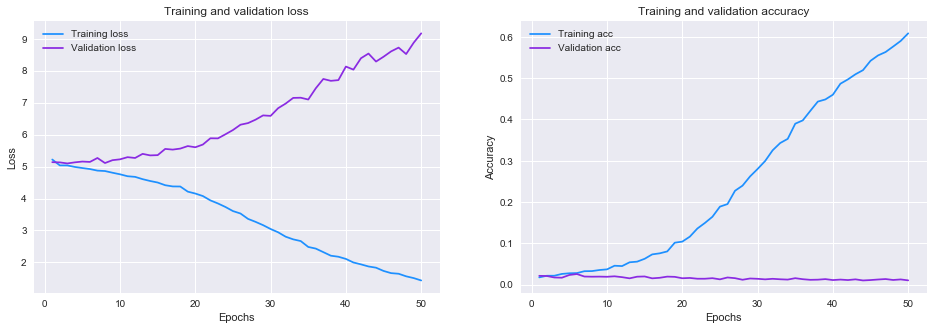

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  50.24057586664141 ;   Top2-EM:  58.617162341352525 ;   Top3-EM:  62.24663762076151 

                          loss  =  2.6269942461213596
                          acc  =  0.5840121235082402
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  1.3324450366422385 ;   Top2-EM:  2.2984676882078614 ;   Top3-EM:  3.1978680879413726 

                          loss  =  9.245457215280553
                          acc  =  0.012325

In [7]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


## Model (Added dropout in RNN layers) - 50 epochs
---

In [9]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, trainable=False, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, trainable=False, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.2, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.2, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.2, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.2, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.2, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.0005)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[tb, mc])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

## Evaluation
---

Evaluating the model . . . 

3002/3002 [==============================] - 32s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



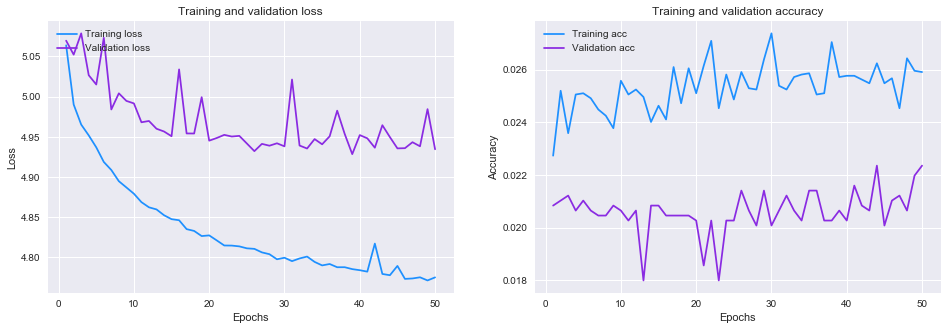

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  2.799772684220496 ;   Top2-EM:  5.345709414661868 ;   Top3-EM:  7.103618109490434 

                          loss  =  4.784560389608162
                          acc  =  0.025042621708939214
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  2.564956695536309 ;   Top2-EM:  5.662891405729513 ;   Top3-EM:  7.061958694203864 

                          loss  =  4.846148966154522
                          acc  =  0.023984010

In [10]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)



## Model (dropout=0.3 + learning rate incresed to 0.005) - 50 epochs
---

In [11]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, trainable=False, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, trainable=False, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.005)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=50,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc])



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

## Evaluation
---

Evaluating the model . . . 

3002/3002 [==============================] - 32s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



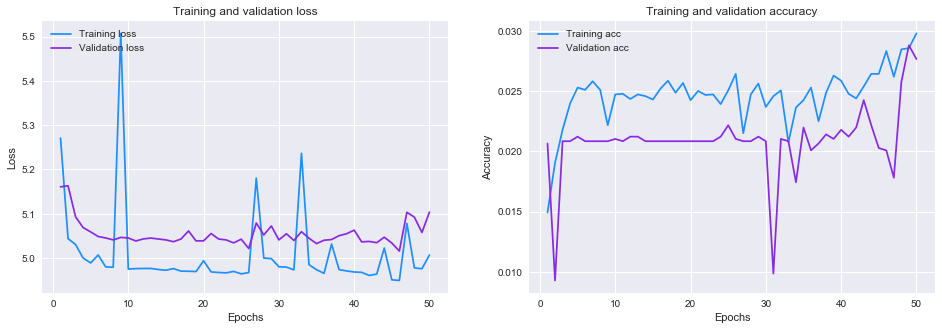

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  3.8151164993369955 ;   Top2-EM:  5.372229588937299 ;   Top3-EM:  6.99753741238871 

                          loss  =  4.998047148420359
                          acc  =  0.034362568668590665
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  4.230512991339107 ;   Top2-EM:  5.36309127248501 ;   Top3-EM:  7.028647568287808 

                          loss  =  5.0141124426722925
                          acc  =  0.037974683

In [12]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)




## Model (learning rate = 0.008) - 20 epochs

In [14]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, trainable=False, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, trainable=False, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.008)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=20,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

## Evaluation
---

Evaluating the model . . . 

3002/3002 [==============================] - 33s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



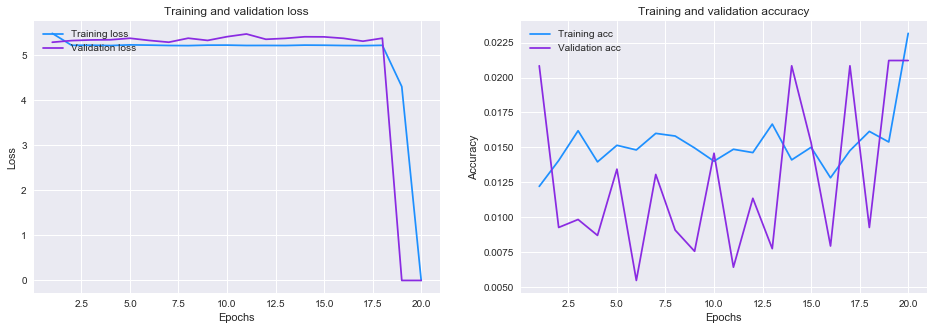

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  0.003788596325061565 ;   Top2-EM:  0.003788596325061565 ;   Top3-EM:  0.003788596325061565 

                          loss  =  1.1920930376163597e-07
                          acc  =  0.022769463913902277
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  0.0 ;   Top2-EM:  0.0 ;   Top3-EM:  0.0 

                          loss  =  1.1920930376163597e-07
                          acc  =  0.02465023317788141



Evaluating 

In [15]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)




## Final Model (dropout=0.3, learning rate=0.05) - 100 epochs
---

In [16]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, trainable=False, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, trainable=False, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.005)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
                 
history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=100,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

21116/21116 [==============================] - 61s 3ms/step - loss: 4.8794 - acc: 0.0352 - val_loss: 5.0797 - val_acc: 0.0260
Epoch 98/100
21116/21116 [==============================] - 65s 3ms/step - loss: 4.8763 - acc: 0.0331 - val_loss: 5.0734 - val_acc: 0.0229
Epoch 99/100
21116/21116 [==============================] - 62s 3ms/step - loss: 4.8749 - acc: 0.0331 - val_loss: 5.0666 - val_acc: 0.0258
Epoch 100/100
21116/21116 [==============================] - 61s 3ms/step - loss: 4.8733 - acc: 0.0328 - val_loss: 5.0749 - val_acc: 0.0261


Evaluating the model . . . 

3002/3002 [==============================] - 36s 12ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



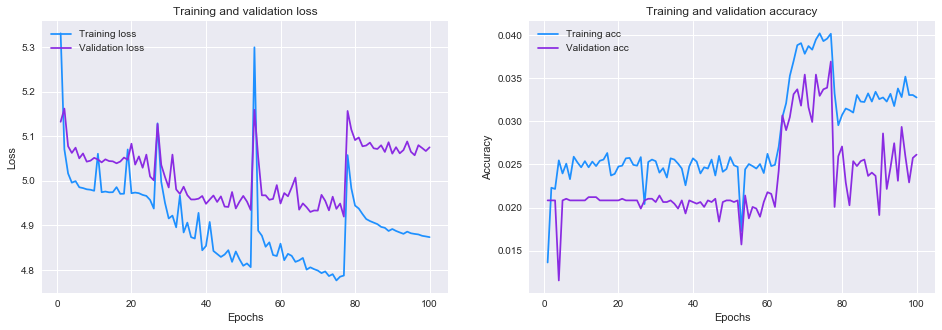

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  3.6143208941087326 ;   Top2-EM:  5.425269937488161 ;   Top3-EM:  7.02026899033908 

                          loss  =  4.890688371793816
                          acc  =  0.03246827050605988
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  3.4976682211858763 ;   Top2-EM:  5.096602265156562 ;   Top3-EM:  6.429047301798801 

                          loss  =  4.967088468387713
                          acc  =  0.030979347

In [17]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)




In [4]:
context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=64, input_dim=vocabulary_size,
                         input_length=c_maxlen, trainable=False, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=64, input_dim=vocabulary_size, 
                         input_length=q_maxlen, trainable=False, name='question_embedding')(question_input)

Q = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(question_embedding)
D = Bidirectional(GRU(64, dropout=0.3, return_sequences=True))(context_embedding)
Q1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(Q)
D1 = Bidirectional(GRU(96, dropout=0.3, return_sequences=True))(D)
Q2 = GRU(128, dropout=0.3, return_sequences=False)(Q1)
D2 = SimpleAttention(128, Q2, 128, return_sequences=False)(D1)
L = concatenate([D2, Q2])

answer = Dense(c_maxlen, activation='softmax', name='start')(L)


model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()
tb = TensorBoard(log_dir='models_logs/attention')
mc = ModelCheckpoint('../saved_models/attention_best.h5', monitor='val_loss', mode='min', save_best_only=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.0001)

history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=500,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc, lr])



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_embedding (Embedding)   (None, 276, 64)      5493632     context_input[0][0]              
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 64)       5493632     question_input[0][0]             
__________________________________________________________________________________________________
bidirectio

21116/21116 [==============================] - 59s 3ms/step - loss: 4.7511 - acc: 0.0268 - val_loss: 4.9201 - val_acc: 0.0220
Epoch 98/500
21116/21116 [==============================] - 58s 3ms/step - loss: 4.7573 - acc: 0.0275 - val_loss: 4.9200 - val_acc: 0.0222
Epoch 99/500
21116/21116 [==============================] - 58s 3ms/step - loss: 4.7522 - acc: 0.0269 - val_loss: 4.9207 - val_acc: 0.0218
Epoch 100/500
21116/21116 [==============================] - 58s 3ms/step - loss: 4.7503 - acc: 0.0267 - val_loss: 4.9194 - val_acc: 0.0225
Epoch 101/500
21116/21116 [==============================] - 58s 3ms/step - loss: 4.7512 - acc: 0.0273 - val_loss: 4.9214 - val_acc: 0.0222
Epoch 102/500
21116/21116 [==============================] - 59s 3ms/step - loss: 4.7510 - acc: 0.0267 - val_loss: 4.9226 - val_acc: 0.0210
Epoch 103/500
21116/21116 [==============================] - 58s 3ms/step - loss: 4.7511 - acc: 0.0271 - val_loss: 4.9224 - val_acc: 0.0222
Epoch 104/500
21116/21116 [=========

KeyboardInterrupt: 

Evaluating the model . . . 

3002/3002 [==============================] - 33s 11ms/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



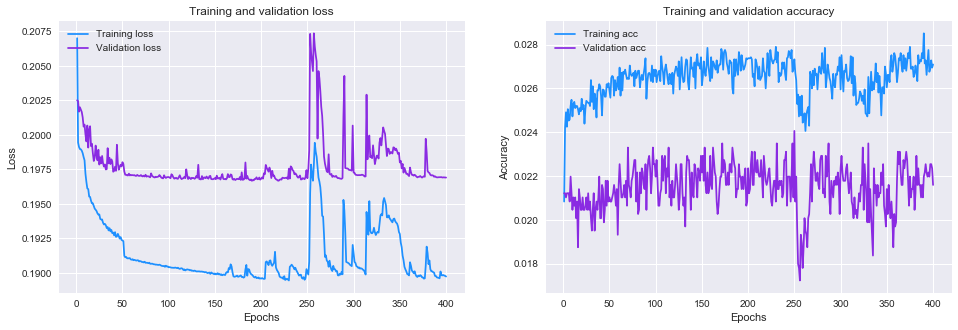

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  2.8528130327713583 ;   Top2-EM:  5.360863799962114 ;   Top3-EM:  7.2665277514680815 

                          loss  =  0.19099150281452415
                          acc  =  0.025648797120949064
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  2.365089940039973 ;   Top2-EM:  5.52964690206529 ;   Top3-EM:  7.128580946035976 

                          loss  =  0.19323825741870493
                          acc  =  0.0226

In [8]:
%run ../attention_layer.ipynb
custom_objects = {'SimpleAttention': SimpleAttention}
%run ../../evaluation/ow_evaluate.ipynb

#saved_model = load_model('../saved_models/attention_best.h5', custom_objects=custom_objects)# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
#train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
#dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

#evaluation_main(train_data, dev_data, saved_model, history.history)



